<a href="https://colab.research.google.com/github/roshi45/PNEUMONIA-PREDICTION/blob/main/Pneumonia_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

paultimothymooney_chest_xray_pneumonia_path = kagglehub.dataset_download('paultimothymooney/chest-xray-pneumonia')
roshi45_affected_path = kagglehub.dataset_download('roshi45/affected')
roshi45_affected1_path = kagglehub.dataset_download('roshi45/affected1')
roshi45_normal_path = kagglehub.dataset_download('roshi45/normal')

print('Data source import complete.')


In [ ]:
 !pip install tensorflow


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix


In [ ]:
print(os.listdir('//kaggle/input/chest-xray-pneumonia/chest_xray'))


['chest_xray', '__MACOSX', 'val', 'test', 'train']


In [ ]:
train_directory = "/kaggle/input/chest-xray-pneumonia/chest_xray/train"
test_directory = "/kaggle/input/chest-xray-pneumonia/chest_xray/test"
val_directory = "/kaggle/input/chest-xray-pneumonia/chest_xray/val"

In [ ]:
print(os.listdir(train_directory))
print(os.listdir(test_directory))
print(os.listdir(val_directory))

['PNEUMONIA', 'NORMAL']
['PNEUMONIA', 'NORMAL']
['PNEUMONIA', 'NORMAL']


In [ ]:
os.listdir(train_directory)[0]


'PNEUMONIA'

In [ ]:
labels = ["PNEUMONIA","NORMAL"]
labels


['PNEUMONIA', 'NORMAL']

In [ ]:
def accessingfolder(directory):
    normal = os.path.join(directory,"NORMAL")
    pneumonia = os.path.join(directory,"PNEUMONIA")

    return normal,pneumonia

In [ ]:
test_normal , test_pneu = accessingfolder(test_directory)
print("Number of Normal in Test: ", len(os.listdir(test_normal)))
print("Number of Pneumonia in Test: ", len(os.listdir(test_pneu)))


Number of Normal in Test:  234
Number of Pneumonia in Test:  390


In [ ]:
# for train_directory
train_normal , train_pneu = accessingfolder(train_directory)
print("Number of Normal in Train: ", len(os.listdir(train_normal)))
print("Number of Pneumonia in Train: ", len(os.listdir(train_pneu)))



Number of Normal in Train:  1341
Number of Pneumonia in Train:  3875


In [ ]:
#for val_directory
val_normal , val_pneu = accessingfolder(val_directory)
print("Number of Normal in Val: ", len(os.listdir(val_normal)))
print("Number of Pneumonia in Val: ", len(os.listdir(val_pneu)))

Number of Normal in Val:  8
Number of Pneumonia in Val:  8


In [ ]:
os.listdir(train_normal)[0]

'NORMAL2-IM-0771-0001.jpeg'

In [ ]:
sample_normal = os.listdir(train_normal)[0]
sample_pneu=os.listdir(train_pneu)[0]
print(sample_normal)

NORMAL2-IM-0771-0001.jpeg


Shape of Image:  (1128, 1336, 3)


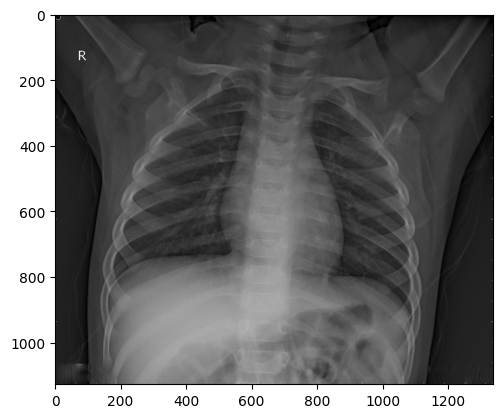

In [ ]:
def printimage(df,sample):
    image =  os.path.join(df,sample)
    img = cv2.imread(image)
    print("Shape of Image: ",img.shape)
    return plt.imshow(img)
printimage(train_normal,sample_normal)


Shape of Image:  (712, 1024, 3)


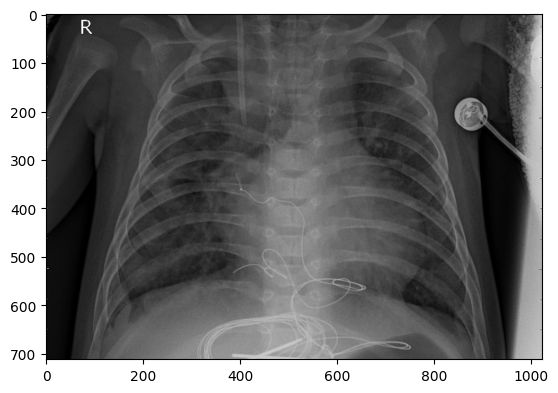

In [ ]:
printimage(train_pneu,sample_pneu)

In [ ]:
def separation(directory, x, y):

    # iterating over normal and pneumonia (total 2 iteration)
    for i in labels:
        path = os.path.join(directory,i)

        for img in os.listdir(path):
            #read images
            current_image = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)

            if current_image is not None:
                resized_img = cv2.resize(current_image,(180,180))
                x.append(resized_img)
                y.append(labels.index(i))
    return x,y

In [ ]:
X_train  = []
y_train  = []

X_test= []
y_test = []
X_train  , y_train = separation(train_directory, X_train , y_train )
X_test  , y_test = separation(test_directory, X_test, y_test )


X_train, y_train = separation(val_directory, X_train , y_train )

In [ ]:
X_train , X_val , y_train , y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
type(X_train),type(y_train)


(list, list)

In [ ]:
print("Training Images Count: " ,len(X_train),len(y_train)),
print("Val Images Count: ",len(X_val),len(y_val)),
print("Test Images Count: ",len(X_test),len(y_test))

Training Images Count:  4185 4185
Val Images Count:  1047 1047
Test Images Count:  624 624


In [ ]:
from collections import Counter
counter = Counter(y_train)
print("Pneumonia Images:" ,counter[0]),
print("Normal Images:" ,counter[1])

Pneumonia Images: 3094
Normal Images: 1091


In [ ]:
 # Normalize the data
X_train_norm = np.array(X_train) / 255
X_val_norm = np.array(X_val) / 255
X_test_norm = np.array(X_test) / 255

In [ ]:
X_train_norm.shape,X_val_norm.shape,X_test_norm.shape

((4185, 180, 180), (1047, 180, 180), (624, 180, 180))

In [ ]:
img_size = 180
# resize data for deep learning
X_train = X_train_norm.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

X_val = X_val_norm.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

X_test = X_test_norm.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [ ]:
X_train.shape,X_val.shape,X_test.shape

((4185, 180, 180, 1), (1047, 180, 180, 1), (624, 180, 180, 1))

In [ ]:
y_train[:100]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [ ]:
from collections import Counter
counter = Counter(y_train)
counter

Counter({0: 3094, 1: 1091})

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# With data augmentation to prevent overfitting and handling the imbalance in dataset

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(96, (11, 11), strides=4, padding='same', activation='relu', input_shape=(180, 180, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((3, 3), strides=2, padding='same'))

# 2nd Convolutional Layer
model.add(Conv2D(256, (5, 5), strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((3, 3), strides=2, padding='same'))

# 3rd Convolutional Layer
model.add(Conv2D(384, (3, 3), strides=1, padding='same', activation='relu'))

# 4th Convolutional Layer
model.add(Conv2D(384, (3, 3), strides=1, padding='same', activation='relu'))

# 5th Convolutional Layer
model.add(Conv2D(256, (3, 3), strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D((3, 3), strides=2, padding='same'))

# Flatten
model.add(Flatten())

# 1st Fully Connected Layer
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

# 2nd Fully Connected Layer
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 45, 45, 96)     │        11,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 45, 45, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 23, 23, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 23, 23, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    37,752,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │         4,097 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,263,617 (222.26 MB)

 Trainable params: 58,262,913 (222.26 MB)

 Non-trainable params: 704 (2.75 KB)

In [ ]:
from keras.callbacks import ReduceLROnPlateau


In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor = "val_accuracy", patience = 2, verbose = 1, factor = 0.3, min_lr = 0.000001)

In [ ]:
history = model.fit(datagen.flow(X_train,y_train, batch_size = 32) ,epochs = 20 , validation_data = datagen.flow(X_val, y_val) ,callbacks = [learning_rate_reduction])

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


131/131 ━━━━━━━━━━━━━━━━━━━━ 283s 2s/step - accuracy: 0.6934 - loss: 179.8408 - val_accuracy: 0.7536 - val_loss: 1.4102 - learning_rate: 0.0010
Epoch 2/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 281s 2s/step - accuracy: 0.7395 - loss: 0.6058 - val_accuracy: 0.7536 - val_loss: 1.4139 - learning_rate: 0.0010
Epoch 3/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7762 - loss: 0.5501
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
131/131 ━━━━━━━━━━━━━━━━━━━━ 278s 2s/step - accuracy: 0.7763 - loss: 0.5497 - val_accuracy: 0.7536 - val_loss: 2.2667 - learning_rate: 0.0010
Epoch 4/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 322s 2s/step - accuracy: 0.8607 - loss: 0.2997 - val_accuracy: 0.7536 - val_loss: 2.2566 - learning_rate: 3.0000e-04
Epoch 5/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 324s 2s/step - accuracy: 0.9109 - loss: 0.2087 - val_accuracy: 0.7755 - val_loss: 1.1511 - learning_rate: 3.0000e-04
Epoch 6/20
131/131 ━━━━━━━━━━━━━━━━━━━━ 279s 2s/step - accuracy: 0.9264 - loss: 0.1940

In [ ]:
print("Loss of the model is - " , model.evaluate(X_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 416ms/step - accuracy: 0.9551 - loss: 0.1267
Loss of the model is -  0.27092626690864563
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 413ms/step - accuracy: 0.9551 - loss: 0.1267
Accuracy of the model is -  90.54487347602844 %


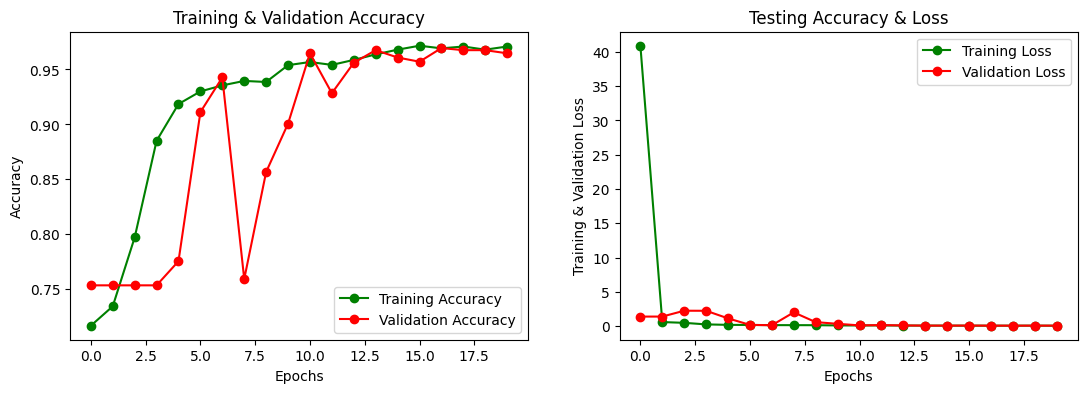

In [ ]:
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(13,4)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [ ]:
predictions = model.predict(X_test)
predictions = predictions.reshape(1,-1)[0]
predictions[:15]

20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 408ms/step


array([3.8614657e-02, 1.0419382e-03, 9.4256893e-02, 8.8912075e-06,
       3.0190437e-05, 7.9581752e-02, 1.1176468e-03, 2.5731507e-03,
       5.8666728e-02, 2.3742038e-04, 4.7276326e-02, 6.4659202e-01,
       1.0130641e-02, 8.0083128e-06, 1.2461118e-04], dtype=float32)

In [ ]:
threshold = 0.5
binary_predictions = (predictions >= threshold).astype(int)


In [ ]:
print(classification_report(y_test, binary_predictions))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       390
           1       0.95      0.79      0.86       234

    accuracy                           0.91       624
   macro avg       0.92      0.88      0.90       624
weighted avg       0.91      0.91      0.90       624



In [ ]:
# Save model
model.save('model.h5')

In [ ]:
from keras.models import load_model

# Load your saved model
model = load_model('model.h5')


In [ ]:
from keras.models import load_model

# Load your saved model
model = load_model('model.h5')


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
# Load images from the test directory in grayscale
test_dataset = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/chest-xray-pneumonia/chest_xray/test',                    # Path to test directory
    image_size=(180, 180),       # Resize images to match model input size
    batch_size=32,               # Adjust batch size as needed
    color_mode='grayscale',      # Convert images to grayscale
    label_mode='binary'          # For binary classification (pneumonia or not)
)

# Normalize the dataset (if necessary)
normalization_layer = tf.keras.layers.Rescaling(1./255)
test_dataset = test_dataset.map(lambda x, y: (normalization_layer(x), y))


Found 624 files belonging to 2 classes.


In [ ]:
# Load the trained model (replace 'model_path' with your actual model path)
model = tf.keras.models.load_model('/kaggle/working/model.h5')


In [ ]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 476ms/step - accuracy: 0.0837 - loss: 5.2085
Test Loss: 5.339456558227539
Test Accuracy: 0.09455128014087677


In [ ]:
import numpy as np

predictions = model.predict(test_dataset)
predicted_classes = np.argmax(predictions, axis=1)  # For multi-class classification
# For binary classification
predicted_classes = (predictions > 0.5).astype("int32")


20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 482ms/step


In [ ]:
import numpy as np

predictions = model.predict(test_dataset)
predicted_classes = np.argmax(predictions, axis=1)  # For multi-class classification
# For binary classification
predicted_classes = (predictions > 0.5).astype("int32")


20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 453ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step


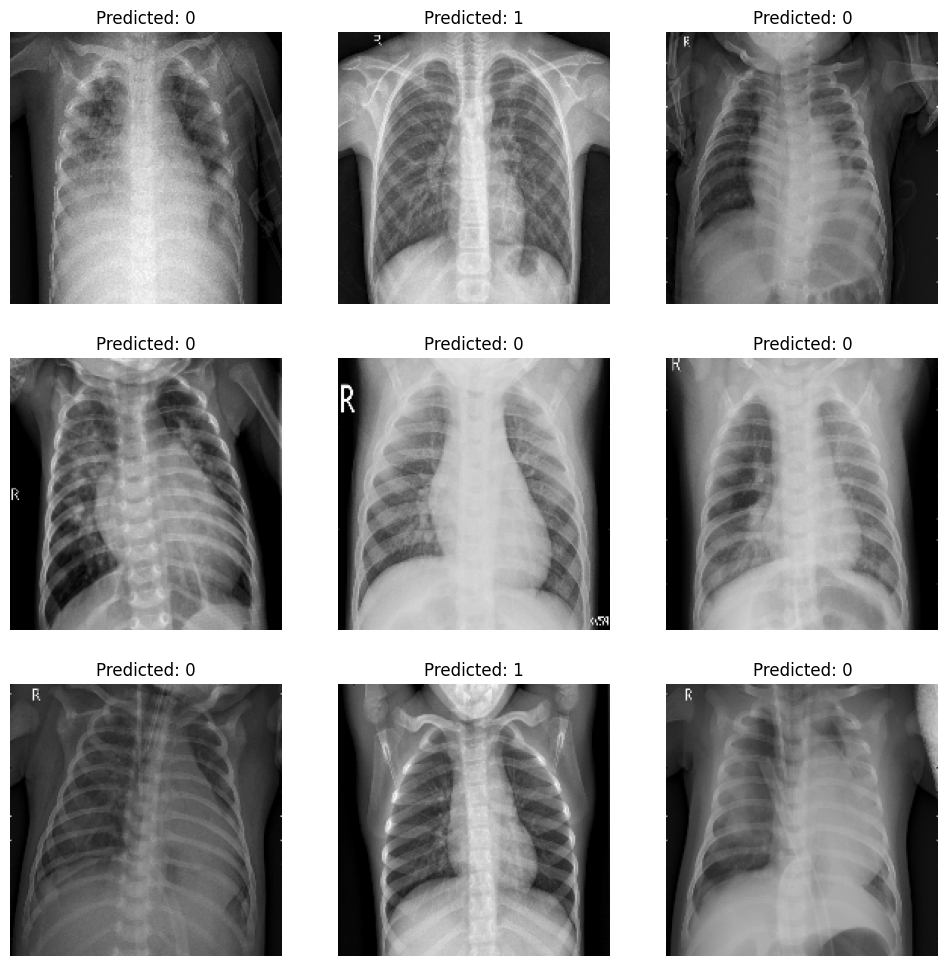

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Initialize lists to store images and their corresponding predictions
predicted_images = []
predicted_classes = []

# Iterate through the test dataset to make predictions
for images, labels in test_dataset.take(1):  # Take only the first batch for visualization
    predictions = model.predict(images)  # Get predictions for this batch
    predicted_classes = (predictions > 0.5).astype("int32").flatten()  # Convert probabilities to binary

    # Store images and predicted classes for visualization
    predicted_images = images.numpy()  # Convert tensor to NumPy array
    predicted_classes = predicted_classes  # Already computed in the previous line

# Visualize the predictions
plt.figure(figsize=(12, 12))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(predicted_images[i], cmap='gray')  # Use the predicted_images list
    plt.title(f"Predicted: {predicted_classes[i]}")
    plt.axis("off")
plt.show()


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
import os

In [ ]:
def load_and_preprocess_image(image_path):
    # Load the image
    img = image.load_img(image_path, target_size=(180, 180), color_mode='grayscale')
    # Convert to array
    img_array = image.img_to_array(img)
    # Expand dimensions to add batch size
    img_array = np.expand_dims(img_array, axis=0)
    # Normalize the image
    img_array = img_array / 255.0
    return img_array

In [ ]:
image_directory = '/kaggle/input/normal'  # Update this path as needed
image_filename = 'normal.jpg'  # Replace with your image filename
image_path = os.path.join(image_directory, image_filename)

In [ ]:
test_image = load_and_preprocess_image(image_path)

In [ ]:
predictions = model.predict(test_image)
predicted_class = 1 if predictions[0][0] > 0.5 else 0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


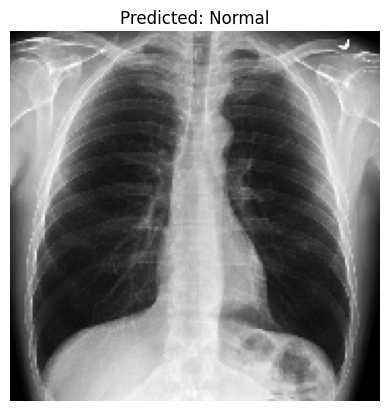

In [ ]:
plt.imshow(test_image[0], cmap='gray')
plt.title(f"Predicted: {'Pneumonia' if predicted_class == 0 else 'Normal'}")
plt.axis('off')
plt.show()


In [ ]:
print(f"Raw prediction value: {predictions[0][0]}")

Raw prediction value: 0.18189966678619385
